<a href="https://colab.research.google.com/github/TaranSchlich/Garment-Industry-Analysis-UW-Madison-MSDIA/blob/main/GB881_Assignment_2_Schlichtmann_T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Garment Industry: An Analysis of Work Productivity
By Taran Schlichtmann

### Import Pandas, Seaborn, Matplotlib Python Library for Data Manipulation, Analysis, and Visualization

In [ ]:
# Loading the Pandas library as pd so it can be referenced in later code as pd
# Loading Seaborn library as sns so it can be referenced in later code as sns
# Loading Matplotlib as plt for later reference as plt

import pandas as pd               # for data manipulation
import seaborn as sns             # for data visualization
import matplotlib.pyplot as plt   # for data visualization

### Loading Raw Data by Reading CSV Files into Dataframes

In [ ]:
# Loading 'Garment January' and 'Garment February' CSV files into separate dataframes using Pandas

url_Jan = 'https://bit.ly/garment_jan'                # Source of dataset for Jan url
url_Feb = 'https://bit.ly/garment_feb'                # Source of dataset for Feb url

# Loading CSV data from URLs into separate dataframes

Dataframe_Jan_Garment = pd.read_csv(url_Jan)
Dataframe_Feb_Garment = pd.read_csv(url_Feb)

### Combined Datasets of Jan and Feb Dataframes and Determining Total Number of Records/Rows

In [ ]:
# Checking the dimensions of each dataframe using .shape to ensure the combined result transfers appropriately

Dataframe_Jan_Garment.shape, Dataframe_Feb_Garment.shape              # Sum of the rows of the result are to match with the rows of the combined dataframes to follow

((547, 15), (443, 15))

In [ ]:
# Concatenate Dataframe_Jan_Garment and Dataframe_Feb_Garment to Determine Total Number of Records/Rows

Dataframe_Combined_Garment = pd.concat([Dataframe_Jan_Garment, Dataframe_Feb_Garment])         # Using the Pandas concat function to combine Jan and Feb dataframes together under a new variable
Dataframe_Combined_Garment.shape                                                               # Checking the dimensions of the combined dataframe to determine the number of rows match with individual dataframe outputs


(990, 15)

Integrating datasets from January and February garment productivity datasets were combined by using pd.concat() to form a unified dataframe. This step ensures a complete view of operations across both months, allowing for consistent analysis and comparison.

### Identifying and Removing Duplicate Records

In [ ]:
# Using sum() to count how many complete rows are duplicated across all columns

sum(Dataframe_Combined_Garment.duplicated(Dataframe_Combined_Garment.columns))

0

In [ ]:
# Removing fully duplicated rows across all columns, keeping the last occurrence of each duplicate
# Overwrite the original dataframe to ensure clean data for downstream analysis

Dataframe_Combined_Garment = Dataframe_Combined_Garment.drop_duplicates(Dataframe_Combined_Garment.columns, keep='last')

# After running this cell, rechecked the duplicate count to confirm it has dropped from 5 to 0 from previous cell

Using duplicate record removal to maintain data integrity. Duplicate rows were identified using .duplicated() and removed with .drop_duplicates(), keeping the last occurrence. This ensures that repeated entries do not skew productivity metrics or visualizations.

### Listing Columns and their Data Types

In [ ]:
# Inspecting column names, data types, and completeness using .info() to validate dataset integrity before cleaning

Dataframe_Combined_Garment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 985 entries, 0 to 442
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   985 non-null    object 
 1   quarter                985 non-null    object 
 2   day                    985 non-null    object 
 3   department             985 non-null    object 
 4   team                   985 non-null    int64  
 5   no_of_workers          985 non-null    float64
 6   smv                    985 non-null    float64
 7   wip                    576 non-null    float64
 8   over_time              985 non-null    int64  
 9   incentive              985 non-null    int64  
 10  no_of_style_change     985 non-null    int64  
 11  idle_time              985 non-null    float64
 12  idle_men               985 non-null    int64  
 13  targeted_productivity  985 non-null    float64
 14  actual_productivity    985 non-null    float64
dtypes: float64(

Identifying data structure using .info() method to inspect column names, data types, and non-null counts. This step confirms that the dataset is properly structured and ready for transformation, with attention to missing values and field formats.

### Preview of the First 5 Records in the Combined Dataset

In [ ]:
# Previewing the first five rows to verify successful merging and inspect initial data structure

Dataframe_Combined_Garment.head(5)                # Index starts at 0

,date,quarter,day,department,team,no_of_workers,smv,wip,over_time,incentive,no_of_style_change,idle_time,idle_men,targeted_productivity,actual_productivity
0,1/1/2015,Quarter1,Thursday,sweing,8,59.0,26.16,1108.0,7080,98,0,0.0,0,0.80,0.940725
1,1/1/2015,Quarter1,Thursday,finishing,1,8.0,3.94,NaN,960,0,0,0.0,0,0.75,0.886500
2,1/1/2015,Quarter1,Thursday,sweing,11,30.5,11.41,968.0,3660,50,0,0.0,0,0.80,0.800570
3,1/1/2015,Quarter1,Thursday,sweing,12,30.5,11.41,968.0,3660,50,0,0.0,0,0.80,0.800570
4,1/1/2015,Quarter1,Thursday,sweing,6,56.0,25.90,1170.0,1920,50,0,0.0,0,0.80,0.800382


The first five rows were displayed using .head() to verify successful merging and to check column alignment. This helps confirm that the data loaded correctly and is ready for cleaning.

### Data Adjustment and Cleaning within Dataset

#### Renaming Columns

In [ ]:
# Renaming columns for clarity and consistency, especially useful for alphabetical sorting in visualization tools
# Using a dictionary to rename multiple fields in a single step, then overwrite the original dataframe

Dataframe_Combined_Garment = Dataframe_Combined_Garment.rename(columns={'targeted_productivity': 'productivity_target',
                                                                        'actual_productivity': 'productivity_actual',
                                                                        'team': 'team_number',
                                                                        'no_of_workers': 'team_workers'})

# Using .rename() method to update the following field names for better representation of data they contain

Dataframe_Combined_Garment = Dataframe_Combined_Garment.rename(columns={'idle_time': 'interruption_time',
                                                                        'idle_men': 'interruption_people',
                                                                        'smv': 'allocated_task_time',
                                                                        'wip': 'unfinished_items',
                                                                        'no_of_style_change': 'style_changes'})

# Verifying renaming changes were made as intended

Dataframe_Combined_Garment.info()



<class 'pandas.core.frame.DataFrame'>
Index: 985 entries, 0 to 442
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 985 non-null    object 
 1   quarter              985 non-null    object 
 2   day                  985 non-null    object 
 3   department           985 non-null    object 
 4   team_number          985 non-null    int64  
 5   team_workers         985 non-null    float64
 6   allocated_task_time  985 non-null    float64
 7   unfinished_items     576 non-null    float64
 8   over_time            985 non-null    int64  
 9   incentive            985 non-null    int64  
 10  style_changes        985 non-null    int64  
 11  interruption_time    985 non-null    float64
 12  interruption_people  985 non-null    int64  
 13  productivity_target  985 non-null    float64
 14  productivity_actual  985 non-null    float64
dtypes: float64(6), int64(5), object(4)
memory usa

Column renaming for clarity to improve readability and support downstream analysis, several columns were renamed using the .rename() method. This step ensures consistent naming conventions and simplification. Renaming was performed in a dictionary operation and applied to the combined dataframe.

#### Replacing Fields

In [ ]:
# Using the .replace() method to update values of each Quarter field for simplicity and readability
# Replacing in a single step using brackets and using cascading lines for readability
# Replacing and overwriting 'quarter' field

Dataframe_Combined_Garment['quarter'] = Dataframe_Combined_Garment['quarter'].replace(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4'], ['Q1',
                                                                                                                                         'Q2',
                                                                                                                                         'Q3',
                                                                                                                                         'Q4'])

# Using .replace() to change 'sweing' typo to the correct spelling 'sewing' within the 'department' field
# Overwriting 'department' field

Dataframe_Combined_Garment['department'] = Dataframe_Combined_Garment['department'].replace('sweing', 'sewing')

# Verifying the replacements were made as intended

Dataframe_Combined_Garment.head()

,date,quarter,day,department,team_number,team_workers,allocated_task_time,unfinished_items,over_time,incentive,style_changes,interruption_time,interruption_people,productivity_target,productivity_actual
0,1/1/2015,Q1,Thursday,sewing,8,59.0,26.16,1108.0,7080,98,0,0.0,0,0.80,0.940725
1,1/1/2015,Q1,Thursday,finishing,1,8.0,3.94,NaN,960,0,0,0.0,0,0.75,0.886500
2,1/1/2015,Q1,Thursday,sewing,11,30.5,11.41,968.0,3660,50,0,0.0,0,0.80,0.800570
3,1/1/2015,Q1,Thursday,sewing,12,30.5,11.41,968.0,3660,50,0,0.0,0,0.80,0.800570
4,1/1/2015,Q1,Thursday,sewing,6,56.0,25.90,1170.0,1920,50,0,0.0,0,0.80,0.800382


Quarter labels were shortened "Quarter1" to "Q1" and a misspelling in the "department" field was corrected "sweing" to "sewing". These changes enhance readability and prevent grouping errors during analysis.

### Sorting Dataframe Fields

In [ ]:
# Sort and overwrite the dataframe to ensure the first row reflects the correct order

Dataframe_Combined_Garment = Dataframe_Combined_Garment.sort_values(['date', 'department', 'productivity_actual'], ascending=True)

# Running new dataframe to find first value of productivity_actual in sort

Dataframe_Combined_Garment

,date,quarter,day,department,team_number,team_workers,allocated_task_time,unfinished_items,over_time,incentive,style_changes,interruption_time,interruption_people,productivity_target,productivity_actual
18,1/1/2015,Q1,Thursday,finishing,11,12.0,4.15,NaN,1440,0,0,0.0,0,0.70,0.436326
16,1/1/2015,Q1,Thursday,finishing,7,8.0,2.90,NaN,960,0,0,0.0,0,0.80,0.540729
15,1/1/2015,Q1,Thursday,finishing,4,18.0,3.94,NaN,2160,0,0,0.0,0,0.75,0.593056
14,1/1/2015,Q1,Thursday,finishing,8,8.0,2.90,NaN,960,0,0,0.0,0,0.75,0.676667
13,1/1/2015,Q1,Thursday,finishing,10,8.0,3.94,NaN,960,0,0,0.0,0,0.65,0.705917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2/9/2015,Q2,Monday,sewing,3,57.0,22.52,1271.0,5400,50,0,0.0,0,0.80,0.800161
138,2/9/2015,Q2,Monday,sewing,12,34.0,15.26,970.0,4080,63,0,0.0,0,0.80,0.800402
136,2/9/2015,Q2,Monday,sewing,2,57.0,22.52,1413.0,360,70,0,0.0,0,0.80,0.900478
135,2/9/2015,Q2,Monday,sewing,1,57.0,22.52,1506.0,3600,70,0,0.0,0,0.80,0.900509


Chronological and performance based sorting the dataframe by date, department, and productivity_actual to organize records chronologically and by performance. This ordering supports accurate identification of trends and outliers.

### Creating New Column within Dataframe

In [ ]:
# Creating a column for productivity difference
# This is the actual productivity minus the target productivity

Dataframe_Combined_Garment['productivity_difference'] = Dataframe_Combined_Garment['productivity_actual'] - Dataframe_Combined_Garment['productivity_target']

# Verifying the column was properly created

Dataframe_Combined_Garment.head()

,date,quarter,day,department,team_number,team_workers,allocated_task_time,unfinished_items,over_time,incentive,style_changes,interruption_time,interruption_people,productivity_target,productivity_actual,productivity_difference
18,1/1/2015,Q1,Thursday,finishing,11,12.0,4.15,NaN,1440,0,0,0.0,0,0.70,0.436326,-0.263674
16,1/1/2015,Q1,Thursday,finishing,7,8.0,2.90,NaN,960,0,0,0.0,0,0.80,0.540729,-0.259271
15,1/1/2015,Q1,Thursday,finishing,4,18.0,3.94,NaN,2160,0,0,0.0,0,0.75,0.593056,-0.156944
14,1/1/2015,Q1,Thursday,finishing,8,8.0,2.90,NaN,960,0,0,0.0,0,0.75,0.676667,-0.073333
13,1/1/2015,Q1,Thursday,finishing,10,8.0,3.94,NaN,960,0,0,0.0,0,0.65,0.705917,0.055917


A new column, productivity_difference, was created to measure the gap between actual and targeted productivity. This derived metric enables deeper insight into team performance and operational efficiency.

### Generating Descriptive Statistics

In [ ]:
# Generating descriptive statistics for the dataframe
# finding the standard deviation of productivity difference field under std
# Looking at the maximum number of workers on a team in the team number field under max

Dataframe_Combined_Garment.describe()

,team_number,team_workers,allocated_task_time,unfinished_items,over_time,incentive,style_changes,interruption_time,interruption_people,productivity_target,productivity_actual,productivity_difference
count,985.000000,985.000000,985.000000,576.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,6.440609,35.053807,15.250294,1240.298611,4736.091371,26.540102,0.151269,0.869036,0.342132,0.731797,0.738565,0.006768
std,3.448338,22.224491,11.024761,2001.655993,3474.294132,31.421322,0.442256,14.005193,3.140300,0.099738,0.178415,0.164120
min,1.000000,2.000000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070000,0.233705,-0.561958
25%,3.000000,9.000000,3.940000,785.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,0.700000,0.650300,-0.016250
50%,7.000000,34.000000,15.260000,1047.000000,4080.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.790003,0.000537
75%,9.000000,57.000000,23.540000,1263.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,0.800000,0.850502,0.100024
max,12.000000,89.000000,54.560000,23122.000000,25920.000000,138.000000,2.000000,300.000000,45.000000,0.800000,1.120437,0.644375


Descriptive statistics were generated to understand the distribution of numeric fields, including standard deviation and maximum team size. These metrics provide a baseline for evaluating variability and capacity.

### Determining Number of Null Values in Dataframe

In [ ]:
# Summing up all null values in dataset in every column

Dataframe_Combined_Garment.isnull().sum()

,0
date,0
quarter,0
day,0
department,0
team_number,0
team_workers,0
allocated_task_time,0
unfinished_items,409
over_time,0
incentive,0


Null values were counted across all columns to assess data completeness. This step highlights fields that may require input or exclusion in further analysis.

### Replacing Null Values in Dataframe

In [ ]:
# Replacing any null value in the 'unfinished_items' field with a 0

Dataframe_Combined_Garment['unfinished_items'] = Dataframe_Combined_Garment['unfinished_items'].fillna(0)

# Verifying the replacement of null values occured as intended

Dataframe_Combined_Garment.isnull().sum()

,0
date,0
quarter,0
day,0
department,0
team_number,0
team_workers,0
allocated_task_time,0
unfinished_items,0
over_time,0
incentive,0


Null values in the unfinished_items column were replaced with 0, reflecting the absence of in process items. This ensures consistency and prevents errors in calculations or visualizations.

### Counting Records in Dataframe

In [ ]:
# Counting frequencies in 'department' column by using value_counts function

Dataframe_Combined_Garment['department'].value_counts()

# Note that 'finishing' is showing up as two separate departments
# Ability to fix the issue with the strip function

,count
department,
sewing,576
finishing,257
finishing,152


The frequency of records by department was analyzed using .value_counts(). An inconsistency was noted where "finishing" appeared as two separate entries and  could be resolved with strip function.

### Generating a Scatterplot

Text(0, 0.5, 'Actual Productivity')

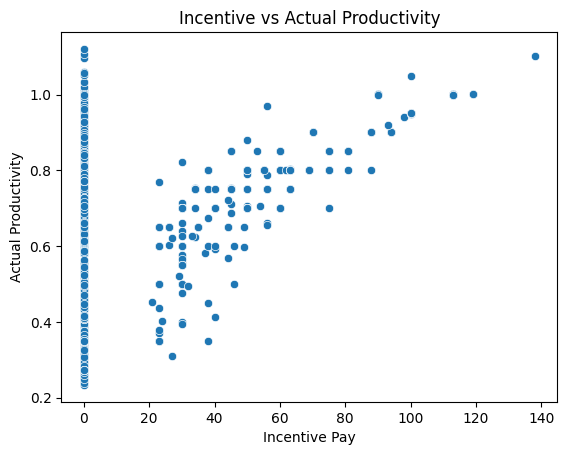

In [ ]:
# Scatterplot to show relationship between incentive and actual productivity
# Seaborn cheat sheet for data science updating title, x, and y axis labels

sns.scatterplot(x='incentive', y='productivity_actual', data=Dataframe_Combined_Garment)
plt.title('Incentive vs Actual Productivity')
plt.xlabel('Incentive Pay')
plt.ylabel('Actual Productivity')

A scatterplot was generated to explore the relationship between incentive pay and actual productivity. This visualization helps identify whether higher incentives correlate with improved performance but may not imply causation.

## Summary of Garment Industry Productivity Analysis

This notebook analyzes garment manufacturing productivity data from January and February. After importing and combining datasets, duplicate records were removed and column names were standardized for clarity. Field values were cleaned to improve consistency, and missing values were populated where appropriate.

A new metric, productivity_difference, was created to measure the gap between actual and targeted productivity. Descriptive statistics and visualizations were used to explore relationships such as the impact of incentive pay on performance.